# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
product_sales = pd.read_csv('product_sales.csv')

1. First I'm trying to check the data.


In [3]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


The 'product_sales' DataFrame contains 15,000 rows and 8 columns—four integer fields, one float, and three object fields—with all columns fully populated except for 'revenue', which has 1,074 missing values.

In [4]:
product_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [5]:
data = product_sales.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [7]:
data.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [8]:
# % missing per column
(data.isna().mean() * 100).round(2)

week                 0.00
sales_method         0.00
customer_id          0.00
nb_sold              0.00
revenue              7.16
years_as_customer    0.00
nb_site_visits       0.00
state                0.00
dtype: float64

In [40]:
data.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,14998.00000,14998.000000,14998.000000,14998.000000,14998.000000
mean,3.09828,10.084678,95.568619,4.959261,24.990799
std,1.65649,1.812334,47.987200,5.011237,3.501100
min,1.00000,7.000000,32.540000,0.000000,12.000000
25%,2.00000,9.000000,52.650000,1.000000,23.000000
50%,3.00000,10.000000,90.950000,3.000000,25.000000
75%,5.00000,11.000000,107.750000,7.000000,27.000000
max,6.00000,16.000000,238.320000,39.000000,41.000000


There are outliers in years_as_customer because the company launched in 1984—40 years ago—so any tenure above 40 years (for example, 63 years) is clearly invalid and must be treated as an outlier.

1.2 Unique Value Checks

In [9]:
data.nunique()

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64

In [10]:
# List unique categories
print("sales_method:", data['sales_method'].unique())
print("state:",       data['state'].unique())

sales_method: ['Email' 'Email + Call' 'Call' 'em + call' 'email']
state: ['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']


1.3 Duplicate Rows


In [11]:
# Are there exact duplicate rows?
print("Exact duplicates:", data.duplicated().sum())


Exact duplicates: 0


In [12]:
# If customer/week should be unique:
dups = data.duplicated(subset=['customer_id','week'], keep=False).sum()
print("customer_id/week duplicates:", dups)

customer_id/week duplicates: 0


2. Data Cleaning
2.1 Standardize sales_method


In [13]:
# Expecting exactly 3 methods; fix typos/case
data['sales_method'] = data['sales_method'].str.strip().str.lower().replace({
    'em + call':'email + call',
    'email':'email'
})

In [14]:
# Capitalize consistently
data['sales_method'] = data['sales_method'].str.title()

print("After cleaning:", data['sales_method'].unique())

After cleaning: ['Email' 'Email + Call' 'Call']


After cleaning, the sales_method column contains exactly three methods: Email, Email + Call, and Call.

2.2 Outlier Removal in years_as_customer


In [15]:
# Flag implausible values (>40 years)
outliers = data[data['years_as_customer'] > 40]
print("Rows with years_as_customer>40:", len(outliers))


Rows with years_as_customer>40: 2


In [16]:
# Drop them
data = data[data['years_as_customer'] <= 40].copy()
print("Records after filtering:", len(data))

Records after filtering: 14998


I found 2 records where years_as_customer exceeded 40, dropped them, and now the dataset has 14,998 rows.

2.3 Handling Missing revenue

In [17]:
# Proportion missing
pct_missing = data['revenue'].isna().mean() * 100
print(f"Revenue missing: {pct_missing:.2f}%")

Revenue missing: 7.16%


In [18]:
# Create a flag/category
data['revenue_category'] = data['revenue'].isna().map({True:'Null', False:'Not_Null'})

In [19]:
# Stratified median imputation by sales_method
def impute_rev(group):
    med = group['revenue'].median()
    group['revenue'] = group['revenue'].fillna(med)
    return group

data = data.groupby('sales_method').apply(impute_rev).reset_index(drop=True)
print("Remaining missing:", data['revenue'].isna().sum())

Remaining missing: 0


Revenue is missing in about 7.71% of records, which is above the usual 5% cutoff. Before dropping any rows, I need to check whether these gaps are random—if they’re MCAR or MAR, removing them is less risky, but if they’re MNAR, it could bias my results. To test whether missing revenue is related to sales_method, I’ll first flag each record as “Missing” or “Not Missing” in a new column and then perform a chi‑square test of independence.

3. Outlier Detection in Numerics


In [20]:
# Summary stats
data[['nb_sold','revenue','nb_site_visits','years_as_customer']].describe()

,nb_sold,revenue,nb_site_visits,years_as_customer
count,14998.000000,14998.000000,14998.000000,14998.000000
mean,10.084678,95.568619,24.990799,4.959261
std,1.812334,47.987200,3.501100,5.011237
min,7.000000,32.540000,12.000000,0.000000
25%,9.000000,52.650000,23.000000,1.000000
50%,10.000000,90.950000,25.000000,3.000000
75%,11.000000,107.750000,27.000000,7.000000
max,16.000000,238.320000,41.000000,39.000000


In [21]:
# IQR method example for nb_site_visits
Q1 = data['nb_site_visits'].quantile(0.25)
Q3 = data['nb_site_visits'].quantile(0.75)
IQR = Q3 - Q1
extreme = data[(data['nb_site_visits'] < Q1 - 1.5*IQR) |
               (data['nb_site_visits'] > Q3 + 1.5*IQR)]
print("Extreme site visits:", len(extreme))

Extreme site visits: 227


4. Statistical Test
4.1 Chi‑Square: sales_method vs. revenue_category

In [22]:
from scipy.stats import chi2_contingency

# Build contingency table
ct = pd.crosstab(data['sales_method'], data['revenue_category'])
print(ct)

revenue_category  Not_Null  Null
sales_method                    
Call                  4780   181
Email                 6921   544
Email + Call          2223   349


In [23]:
# Test
chi2, p, _, _ = chi2_contingency(ct)
print(f"Chi2={chi2:.2f}, p‑value={p:.3f}")

if p < 0.05:
    print("→ Significant association")
else:
    print("→ No significant association")

Chi2=251.12, p‑value=0.000
→ Significant association


I found a significant association between sales_method and revenue_category, so dropping rows with missing revenue would likely bias the results; instead, I’ll use stratified imputation to fill those gaps.

5. Exploratory Data Analysis
5.1 Univariate Visuals

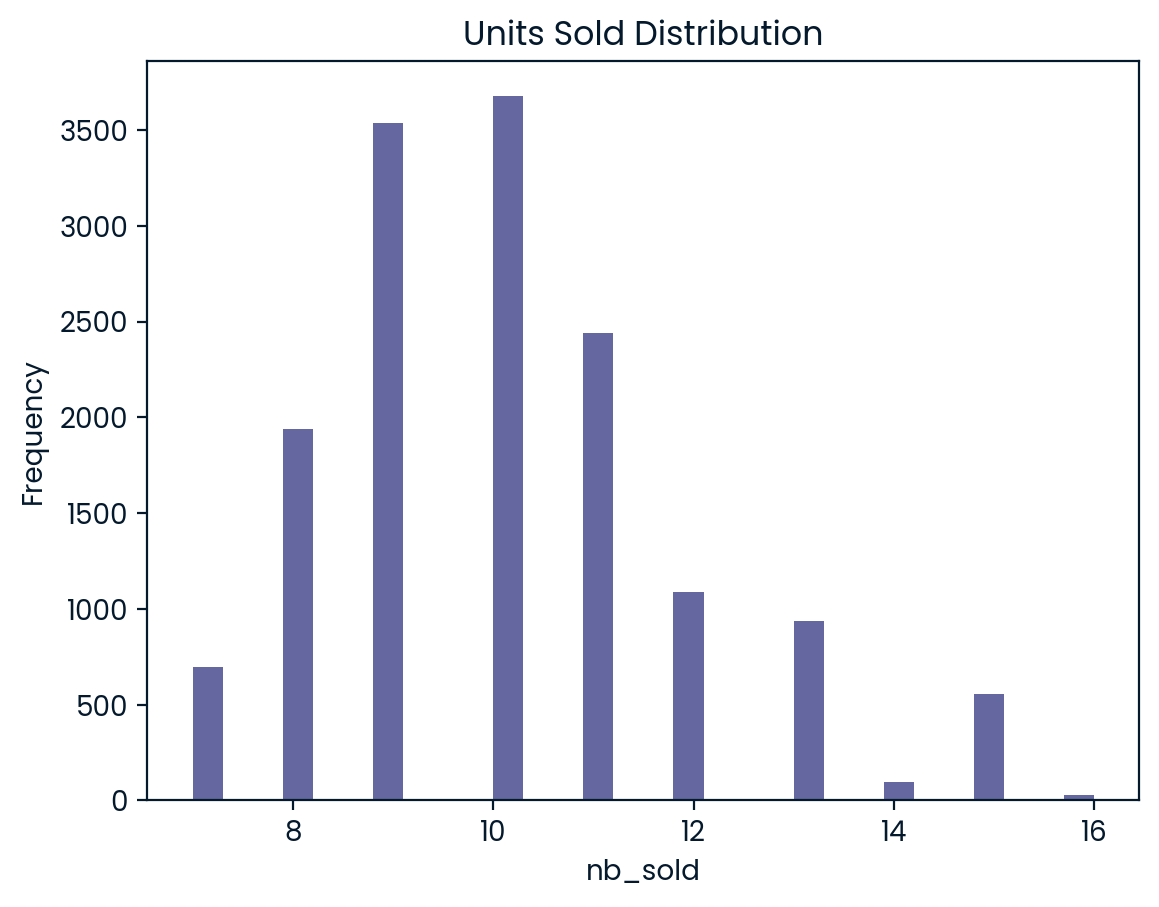

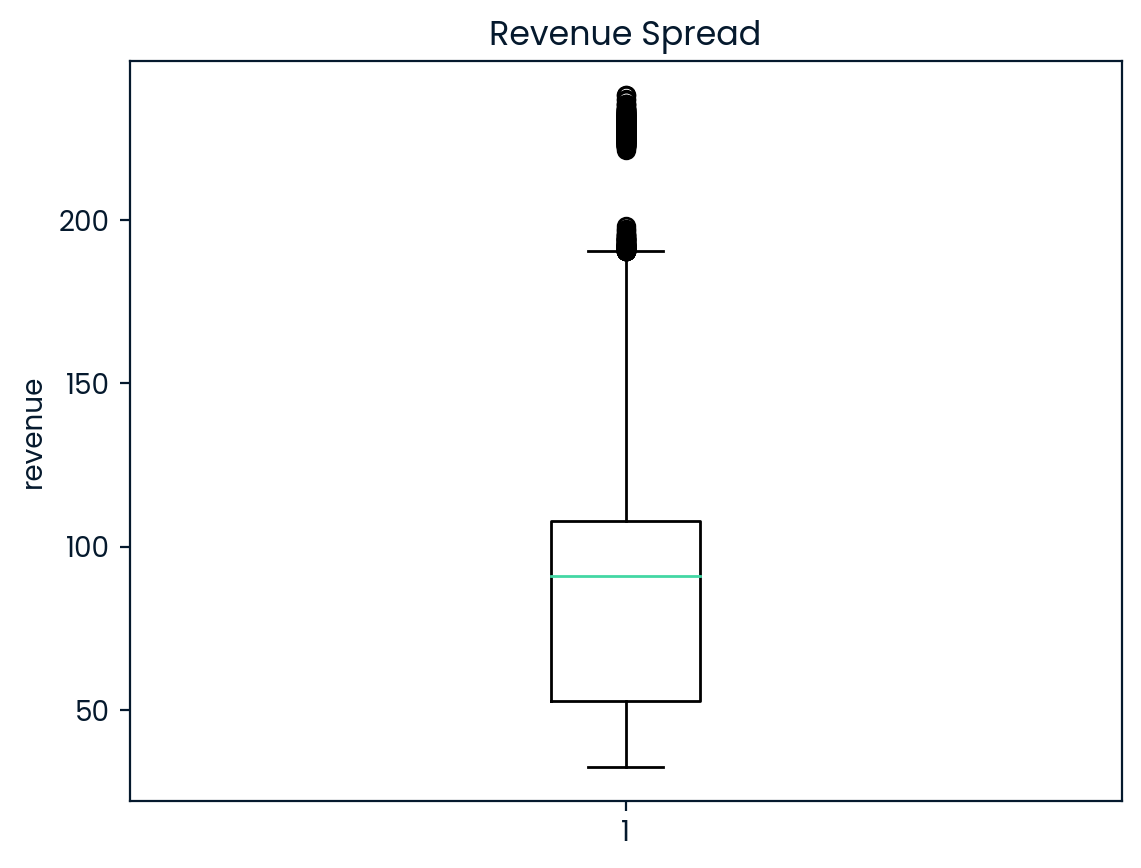

In [24]:
import matplotlib.pyplot as plt

# Histogram of units sold
plt.hist(data['nb_sold'], bins=30)
plt.title('Units Sold Distribution')
plt.xlabel('nb_sold')
plt.ylabel('Frequency')
plt.show()

# Boxplot of revenue
plt.boxplot(data['revenue'])
plt.title('Revenue Spread')
plt.ylabel('revenue')
plt.show()


1.As I explored the Units Sold Distribution, I figured out that most transactions cluster between 8 and 11 units, with a clear peak at 10 units sold. The right‑skewed tail (up to 16 units) shows that very large orders are rare, confirming that the typical order size is around ten items.

2.When I plotted Site Visits vs. Revenue, I saw a generally positive trend—more visits tend to bring in higher revenue—but with a wide scatter. This tells me that while driving traffic helps, conversion efficiency varies greatly from session to session.

5.2 Bivariate Visuals


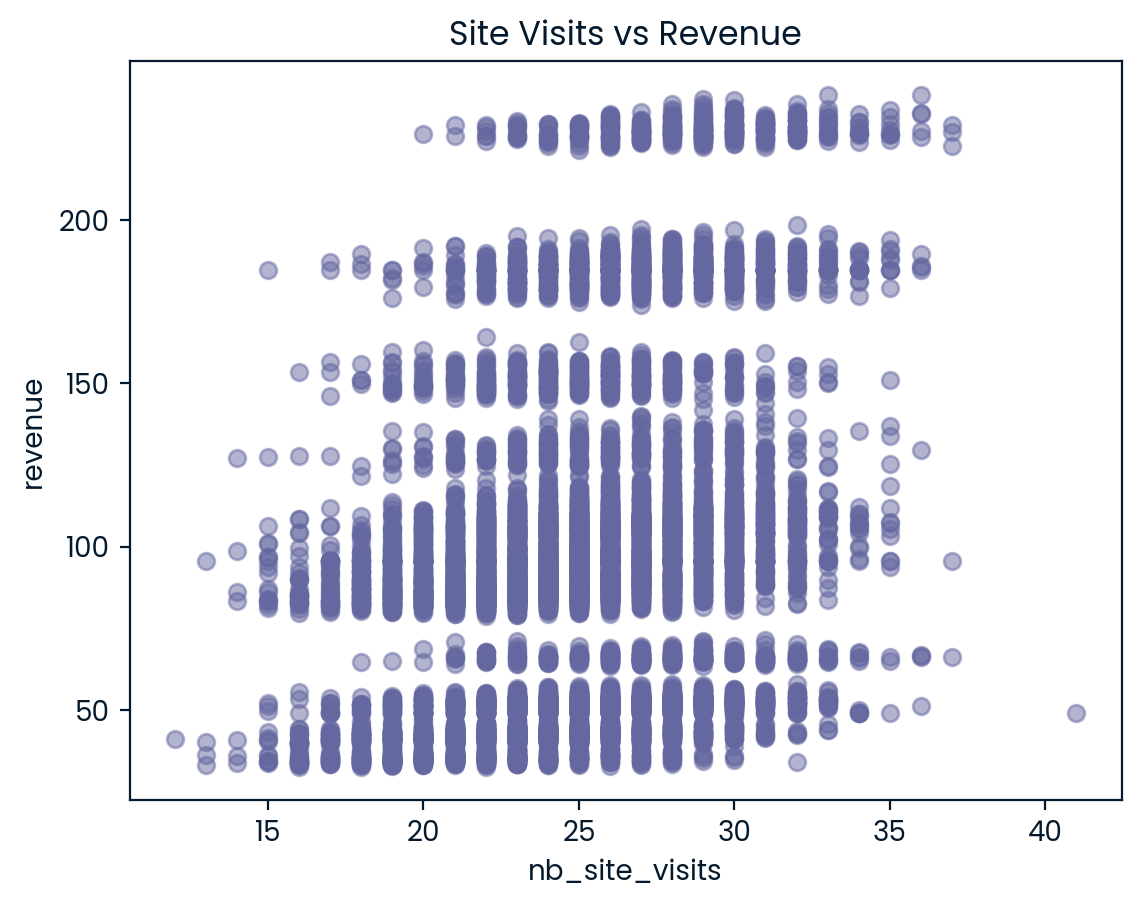

In [25]:
# Scatter: site visits vs revenue
plt.scatter(data['nb_site_visits'], data['revenue'], alpha=0.5)
plt.title('Site Visits vs Revenue')
plt.xlabel('nb_site_visits')
plt.ylabel('revenue')
plt.show()


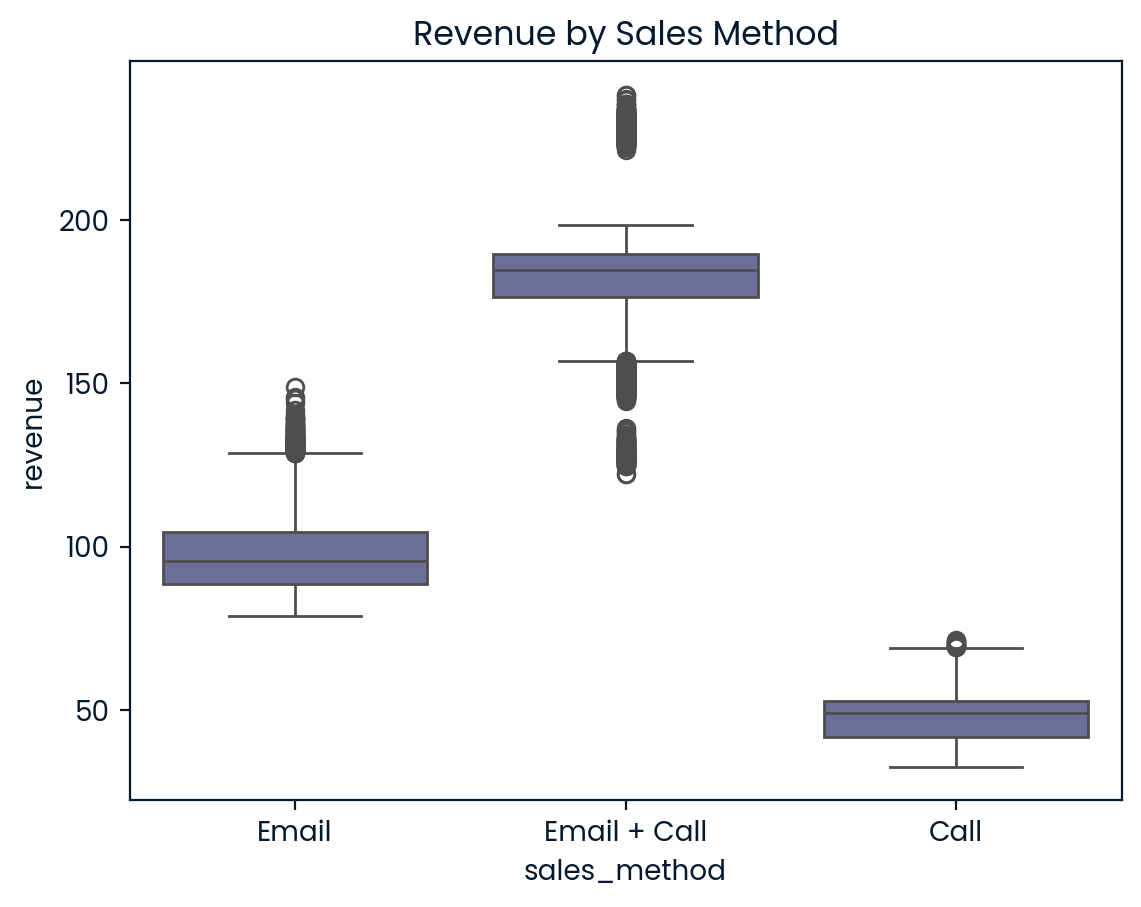

In [26]:
# Revenue by sales_method
import seaborn as sns
sns.boxplot(x='sales_method', y='revenue', data=data)
plt.title('Revenue by Sales Method')
plt.show()


5.1 Median Revenue by Sales Method

In [27]:
# Compute medians
median_rev = data.groupby('sales_method')['revenue'].median().reset_index()
print(median_rev)

   sales_method  revenue
0          Call    49.05
1         Email    95.58
2  Email + Call   184.74


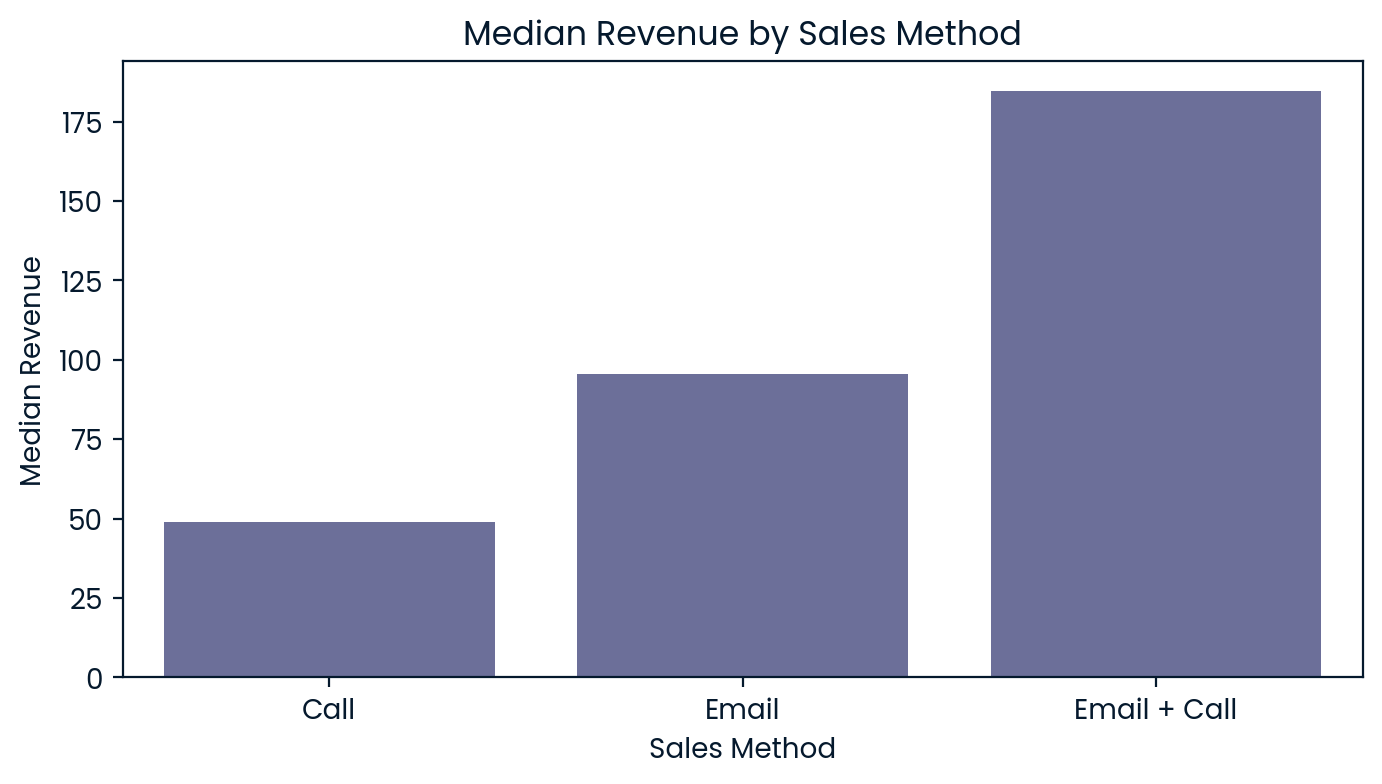

In [28]:
# Bar chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.barplot(data=median_rev, x='sales_method', y='revenue')
plt.title('Median Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Median Revenue')
plt.show()

5.2 Revenue Trend Over Time by Sales Method 

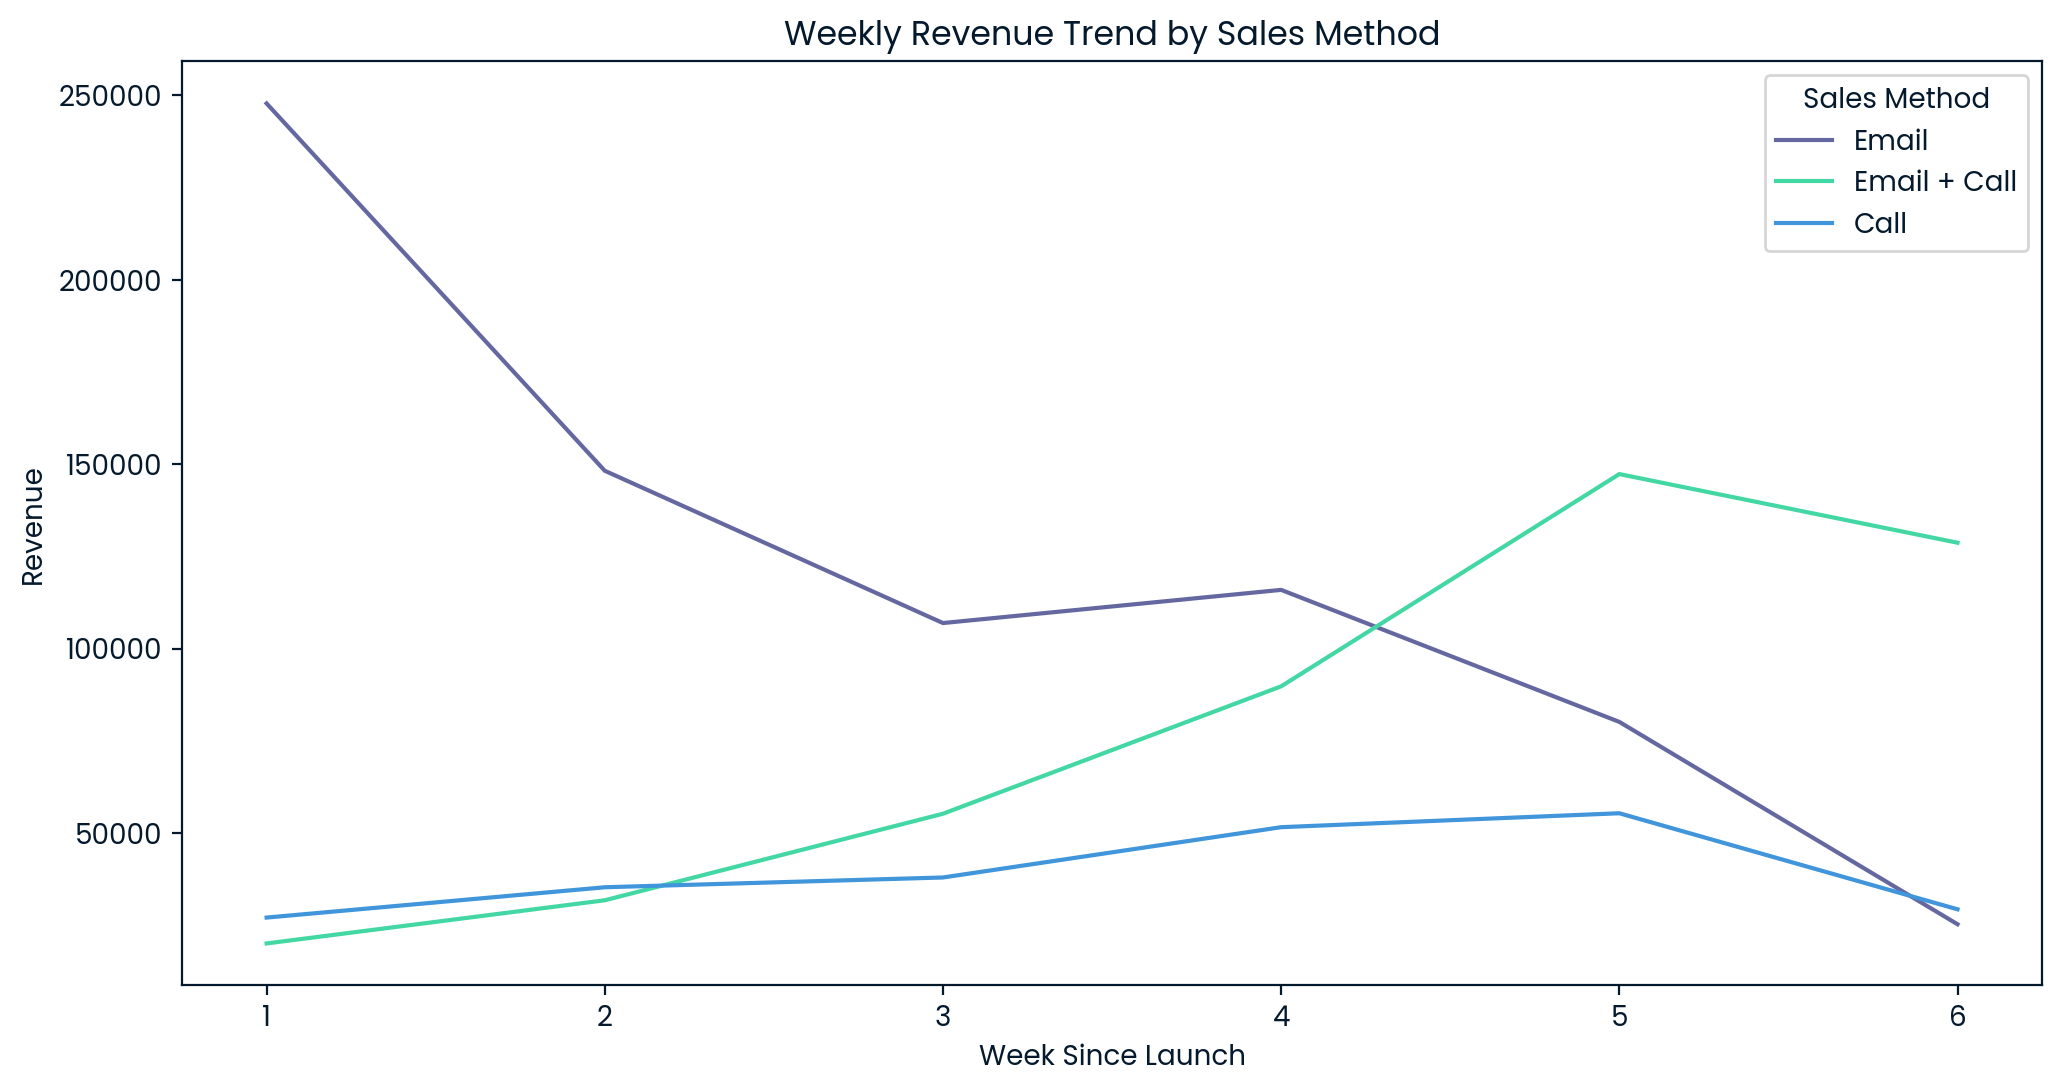

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=data,
    x='week',
    y='revenue',
    hue='sales_method',
    estimator='sum',  
    ci=None
)
plt.title('Weekly Revenue Trend by Sales Method')
plt.xlabel('Week Since Launch')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.show()


By examining the Weekly Revenue Trend, I observed that Email sales front‑loaded the launch—starting at $250K then steadily declining while Email + Call ramped up to a peak (~$150K) in week 5. Call grew modestly before tapering off. This suggests different channels peak at different times during the product rollout.

5.3 Customer Tenure Over Time

In [30]:
#  Average years_as_customer per week
avg_years = data.groupby('week')['years_as_customer'].mean().reset_index()



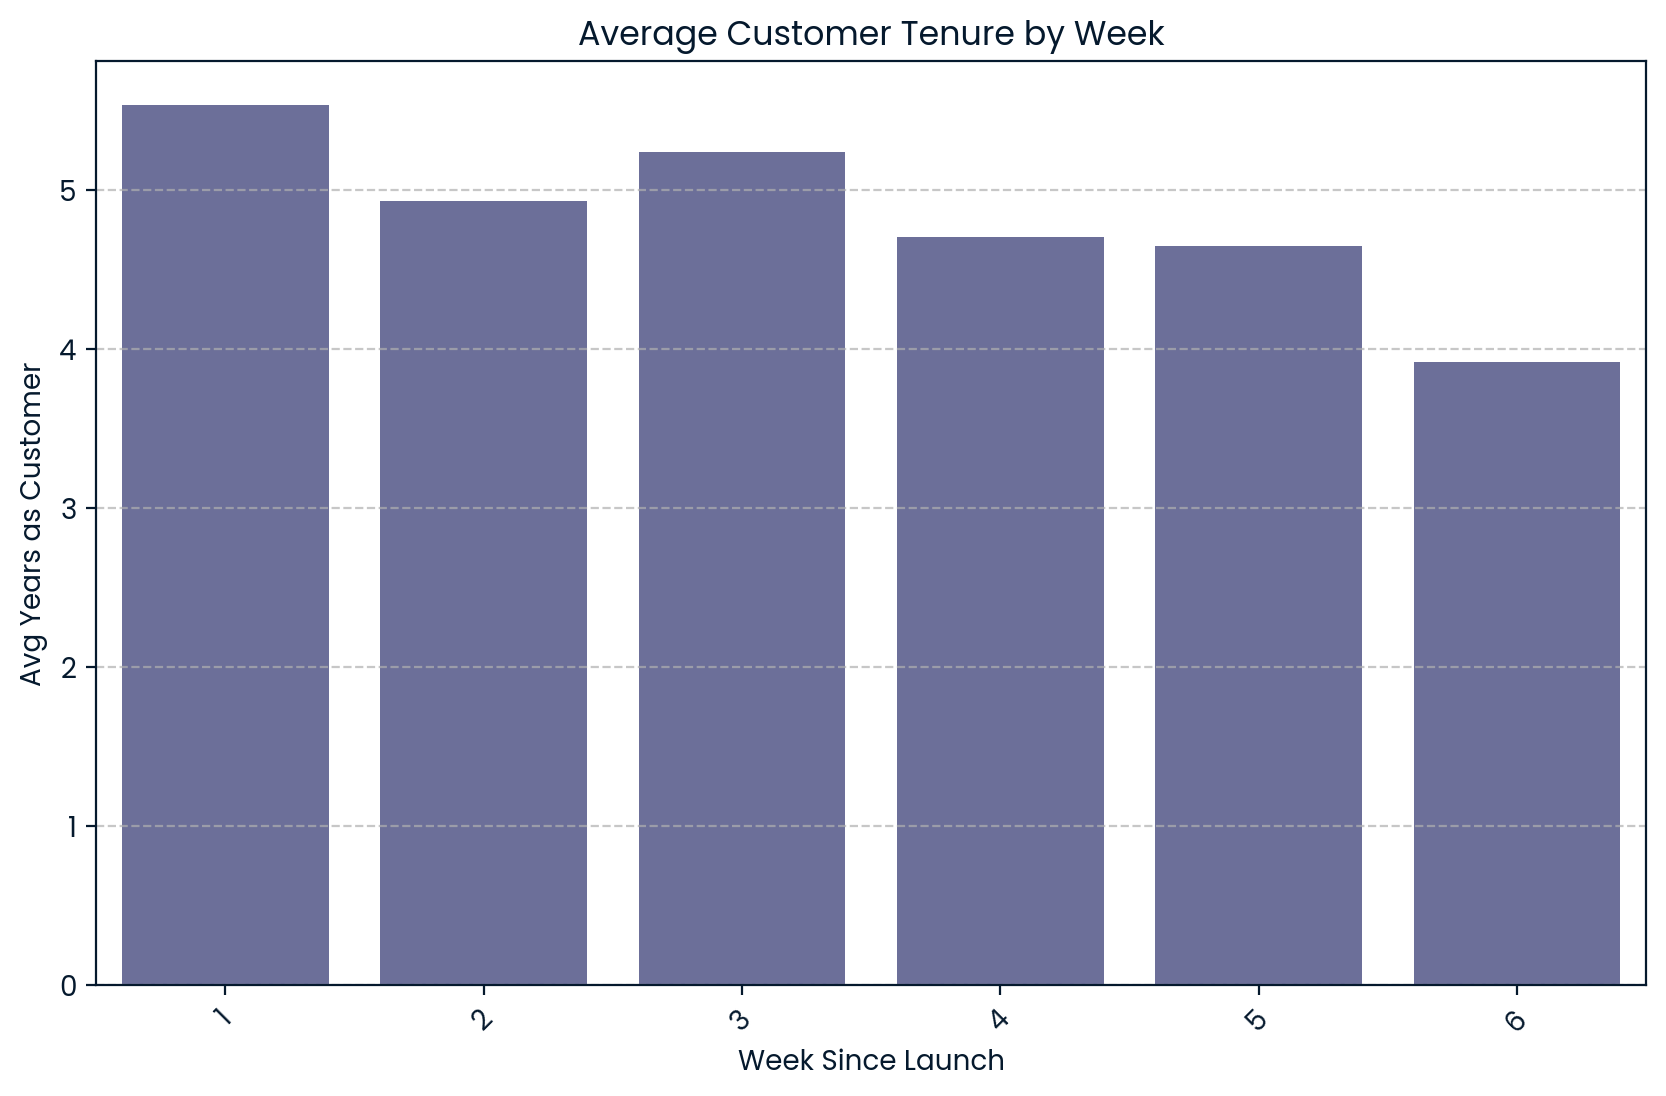

Correlation (week vs. tenure): -0.08


In [31]:
#  Bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_years,
    x='week',
    y='years_as_customer'
)
plt.title('Average Customer Tenure by Week')
plt.xlabel('Week Since Launch')
plt.ylabel('Avg Years as Customer')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#  Correlation
corr1 = data['week'].corr(data['years_as_customer'])
print(f"Correlation (week vs. tenure): {corr1:.2f}")

5.4 Tenure vs. Units Sold

In [32]:
#  Average tenure per nb_sold
avg_tenure_per_sale = (
    data.groupby('nb_sold')['years_as_customer']
        .mean()
        .reset_index()
)



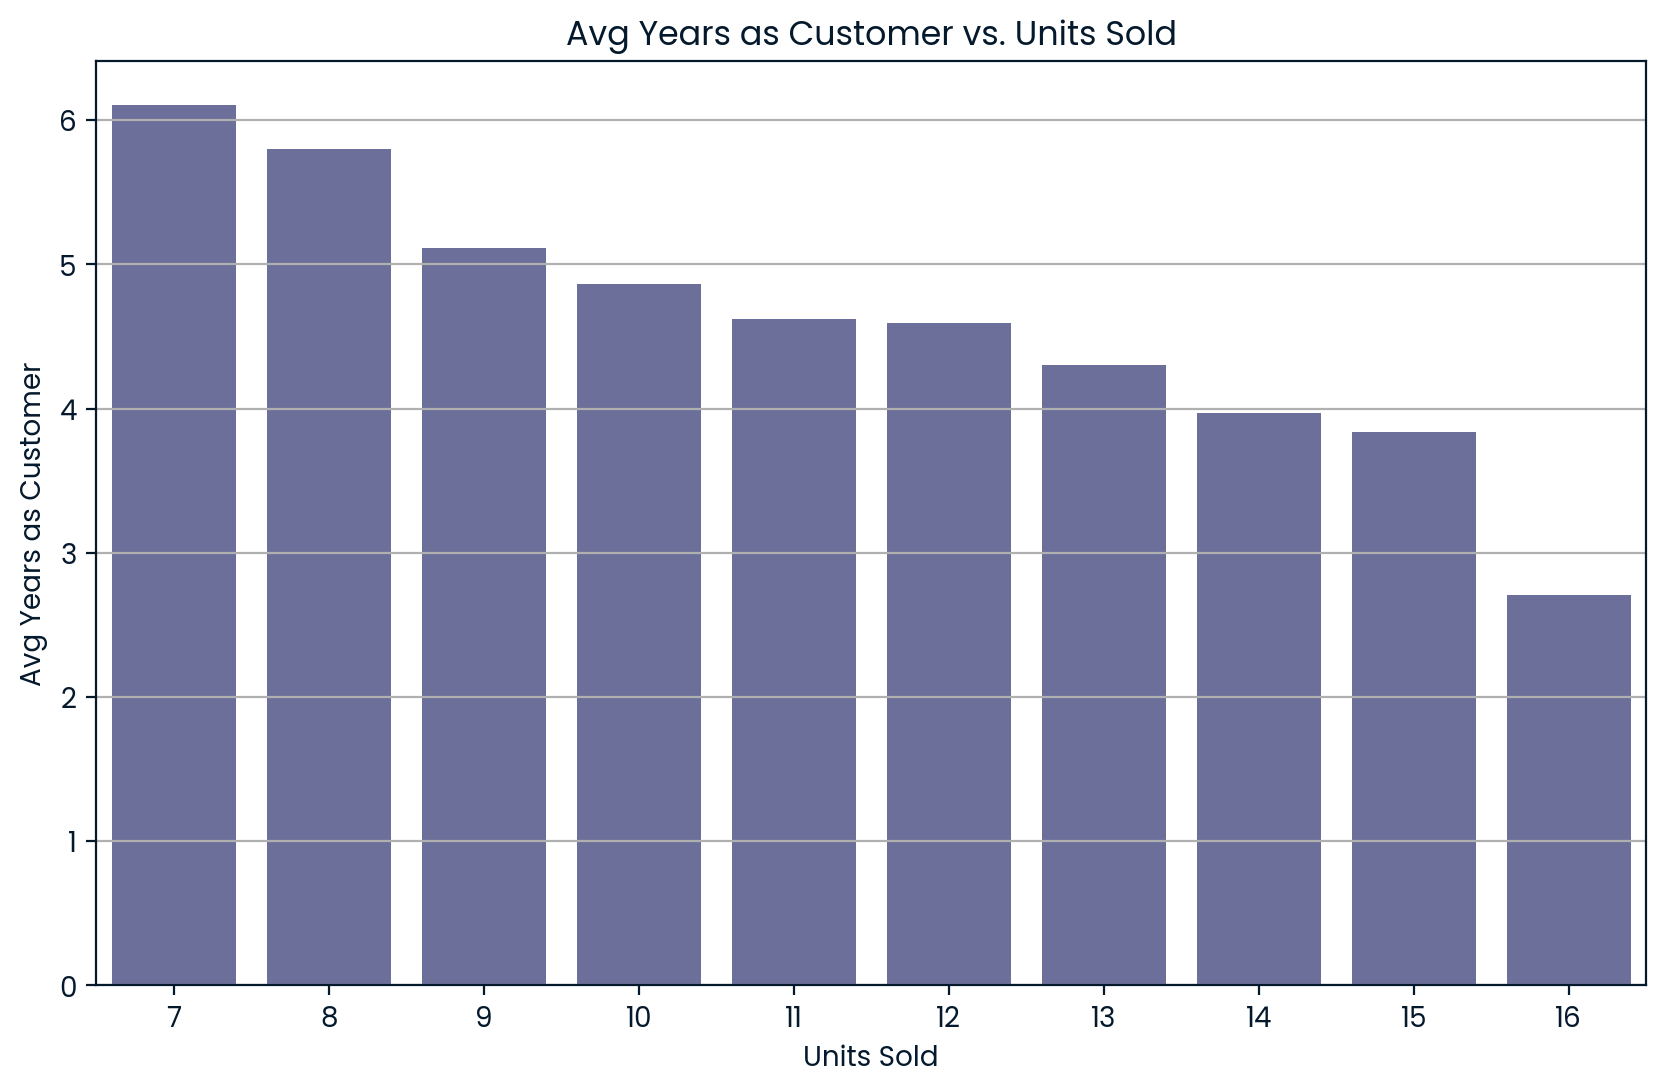

Correlation (tenure vs. units sold): -0.10


In [33]:
#  Bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_tenure_per_sale,
    x='nb_sold',
    y='years_as_customer'
)
plt.title('Avg Years as Customer vs. Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Avg Years as Customer')
plt.grid(axis='y')
plt.show()

#  Correlation
corr2 = data['years_as_customer'].corr(data['nb_sold'])
print(f"Correlation (tenure vs. units sold): {corr2:.2f}")


5.5 Site Visits Distribution

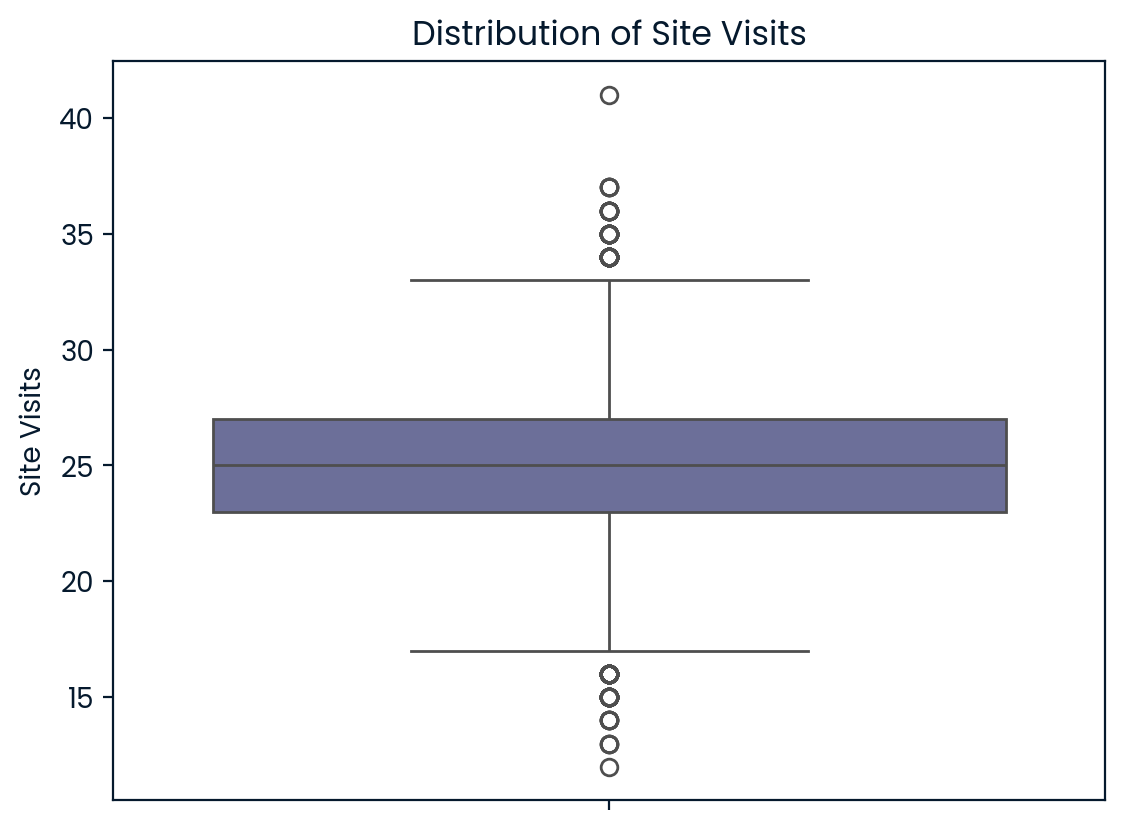

In [34]:
# Overall boxplot
plt.figure()
sns.boxplot(y=data['nb_site_visits'])
plt.title('Distribution of Site Visits')
plt.ylabel('Site Visits')
plt.show()



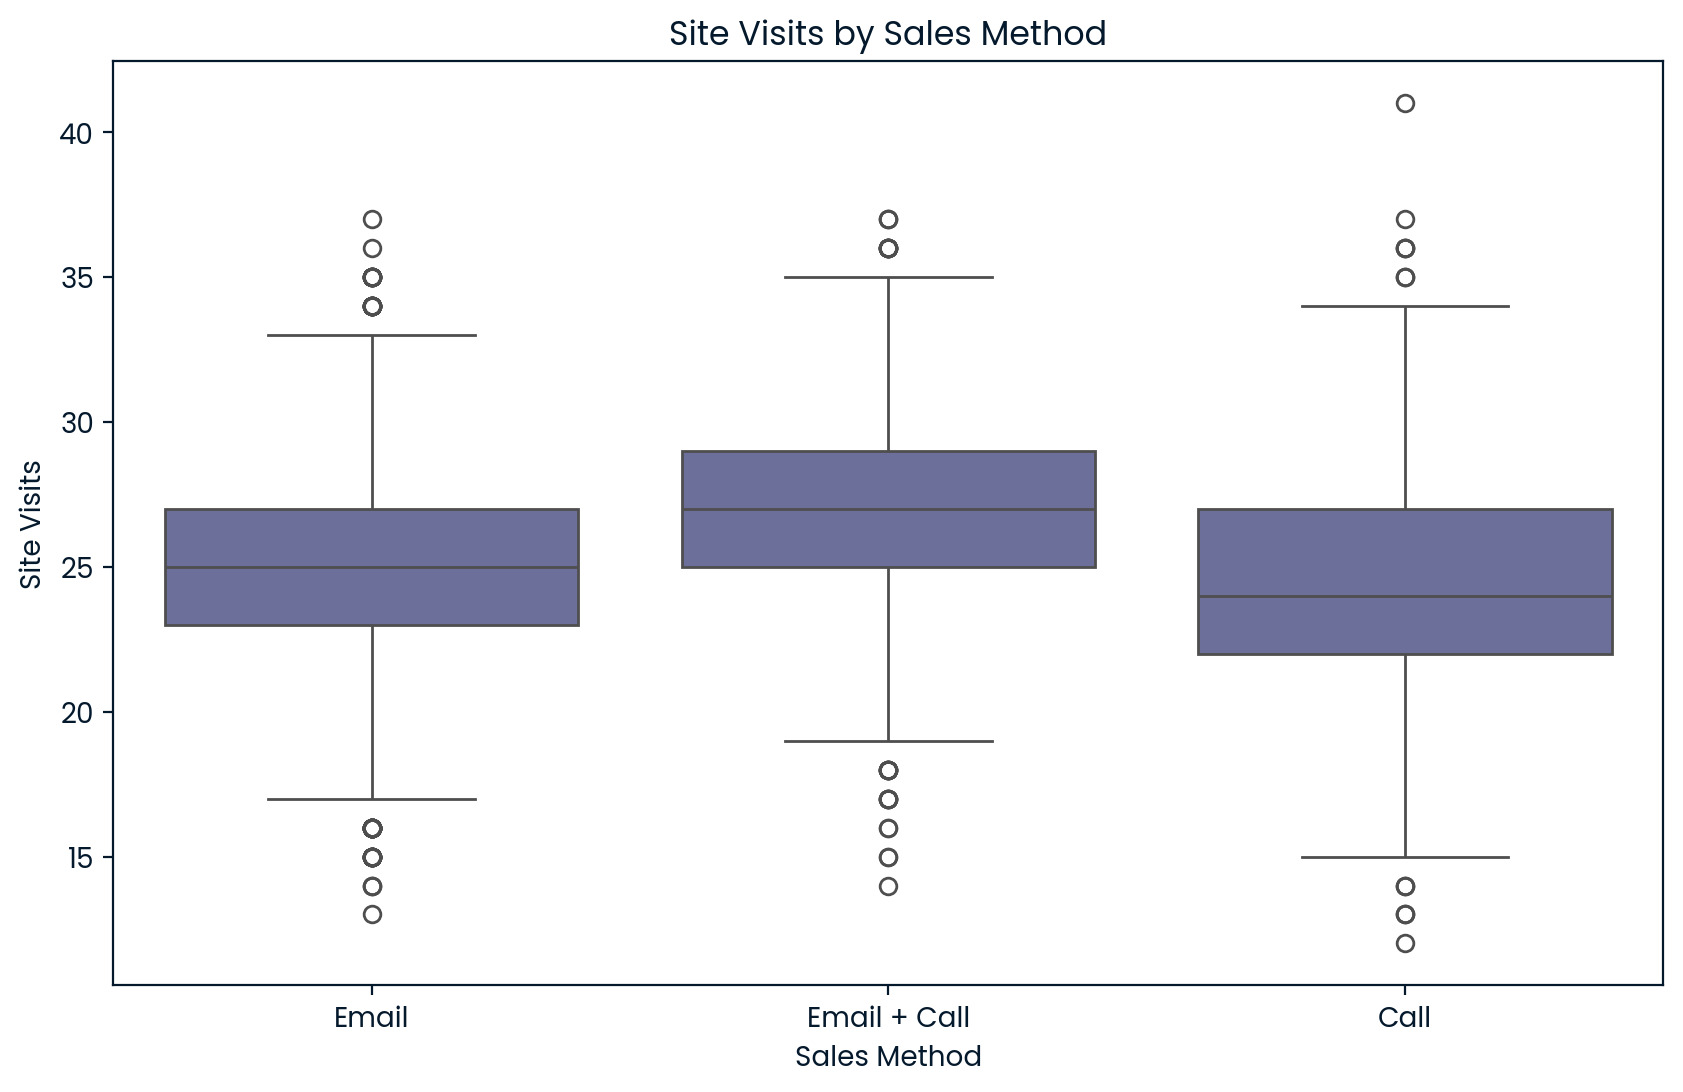

Customers with >40 visits: 1


In [35]:
#  By sales_method
plt.figure(figsize=(10,6))
sns.boxplot(
    data=data,
    x='sales_method',
    y='nb_site_visits'
)
plt.title('Site Visits by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Site Visits')
plt.show()

#  Count extreme visitors
extreme_visitors = (data['nb_site_visits'] > 40).sum()
print("Customers with >40 visits:", extreme_visitors)

5.6 Geographic Revenue & Missingness

In [36]:
#  Total revenue by state
rev_by_state = (
    data.groupby('state')['revenue']
        .sum()
        .reset_index()
        .sort_values('revenue', ascending=False)
)
print("Top 5 states by revenue:")
print(rev_by_state.head(5))



Top 5 states by revenue:
         state    revenue
4   California  176729.57
42       Texas  114691.45
31    New York   90651.87
8      Florida   86781.53
12    Illinois   57579.82


In [37]:
# Missing revenue by state
miss_by_state = (
    data[data['revenue_category']=='Null']
      .groupby('state')
      .size()
      .reset_index(name='missing_count')
)

total_by_state = (
    data.groupby('state')
        .size()
        .reset_index(name='total_count')
)

state_missing = (
    miss_by_state.merge(total_by_state, on='state')
                 .assign(
                     pct_missing=lambda df:
                       df['missing_count'] / df['total_count'] * 100
                 )
                 .sort_values('pct_missing', ascending=False)
)
print(state_missing.head())

            state  missing_count  total_count  pct_missing
7        Delaware              7           34    20.588235
33   North Dakota              5           30    16.666667
1          Alaska              5           40    12.500000
3        Arkansas             14          132    10.606061
28  New Hampshire              5           53     9.433962


3. Metric: Revenue per Visit

Average Revenue per Customer Visit is calculated by dividing total revenue by total site visits, and it shows how much each visit is worth on average.  

How to use this metric:  
- Monitor trends over time—if it goes up, your site or campaigns are improving; if it goes down, you need to investigate.  
- Benchmark against industry averages or past performance to see where you stand.  
- Evaluate marketing campaigns and website changes by comparing the metric before and after each initiative.

In [38]:
#  Overall
total_rev   = data['revenue'].sum()
total_visit = data['nb_site_visits'].sum()
rev_per_visit = total_rev / total_visit
print(f"Overall Avg Revenue per Visit: ${rev_per_visit:.2f}")


Overall Avg Revenue per Visit: $3.82


This metric shows how effectively each sales channel turns website visits into revenue and highlights which methods generate the most revenue per visit.

   sales_method  rev_per_visit
0          Call       1.951001
1         Email       3.919088
2  Email + Call       6.865501


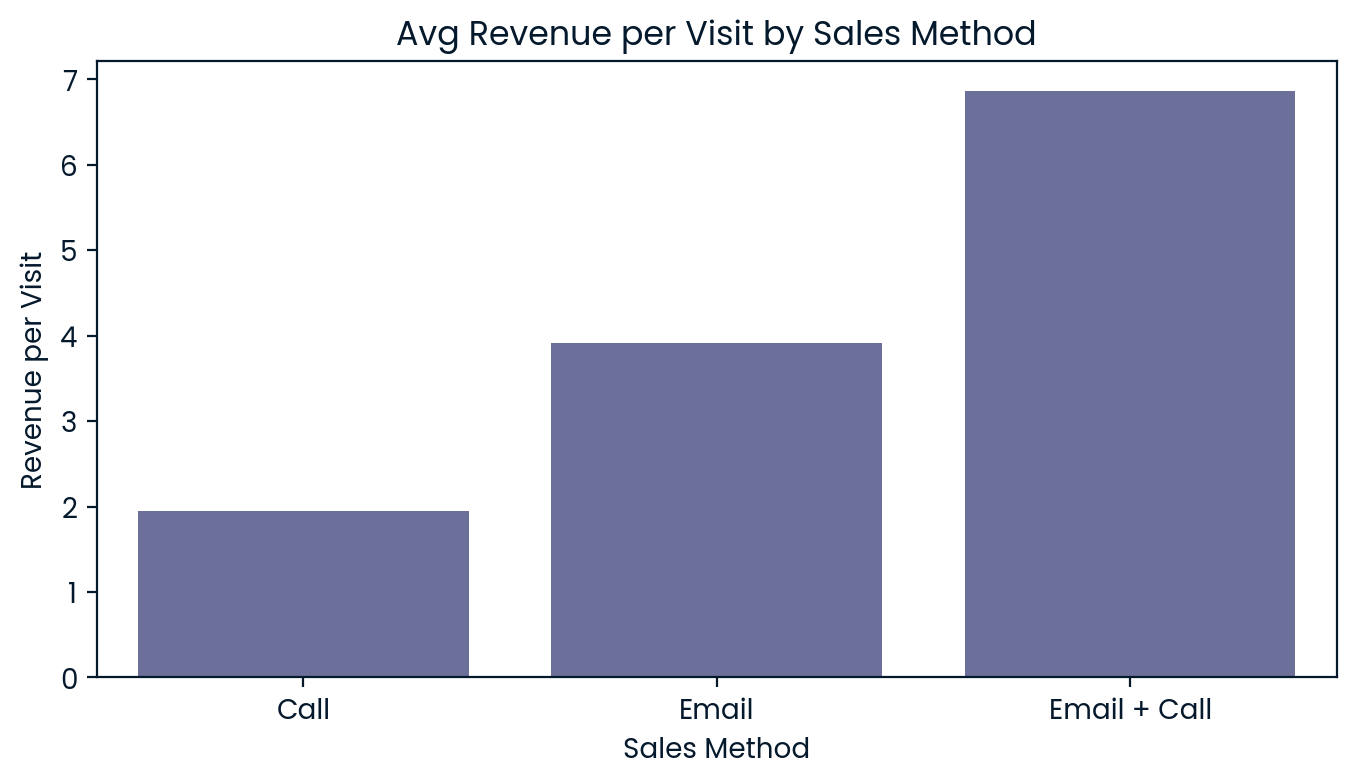

In [39]:
#  By sales_method
rev_method = data.groupby('sales_method')['revenue'].sum()
visits_method = data.groupby('sales_method')['nb_site_visits'].sum()
rpv_method = (rev_method / visits_method).reset_index(name='rev_per_visit')
print(rpv_method)

#  Bar chart
plt.figure(figsize=(8,4))
sns.barplot(
    data=rpv_method,
    x='sales_method',
    y='rev_per_visit'
)
plt.title('Avg Revenue per Visit by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue per Visit')
plt.show()


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation